<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-the-Data" data-toc-modified-id="Get-the-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get the Data</a></span><ul class="toc-item"><li><span><a href="#Download-the-Data" data-toc-modified-id="Download-the-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Download the Data</a></span></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Creating-test-set" data-toc-modified-id="Creating-test-set-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Creating test set</a></span></li></ul></li><li><span><a href="#Discover-and-Visualize-the-Data-to-Gain-Insights" data-toc-modified-id="Discover-and-Visualize-the-Data-to-Gain-Insights-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Discover and Visualize the Data to Gain Insights</a></span><ul class="toc-item"><li><span><a href="#Visualizing-Geographical-Data" data-toc-modified-id="Visualizing-Geographical-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Visualizing Geographical Data</a></span></li><li><span><a href="#Looking-for-correlations" data-toc-modified-id="Looking-for-correlations-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Looking for correlations</a></span></li><li><span><a href="#Experimenting-with-Attribute-Combinations" data-toc-modified-id="Experimenting-with-Attribute-Combinations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Experimenting with Attribute Combinations</a></span></li></ul></li><li><span><a href="#Prepare-the-Data-for-Machine-Learning-Algorithms" data-toc-modified-id="Prepare-the-Data-for-Machine-Learning-Algorithms-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare the Data for Machine Learning Algorithms</a></span><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Handling-Text-and-Categorical-Attributes" data-toc-modified-id="Handling-Text-and-Categorical-Attributes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Handling Text and Categorical Attributes</a></span></li><li><span><a href="#Custom-Transformers" data-toc-modified-id="Custom-Transformers-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Custom Transformers</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#Transformation-Pipelines" data-toc-modified-id="Transformation-Pipelines-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Transformation Pipelines</a></span></li></ul></li><li><span><a href="#Select-and-Train-a-Model" data-toc-modified-id="Select-and-Train-a-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Select and Train a Model</a></span><ul class="toc-item"><li><span><a href="#Training-and-Evaluating-on-the-Training-Set" data-toc-modified-id="Training-and-Evaluating-on-the-Training-Set-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Training and Evaluating on the Training Set</a></span></li><li><span><a href="#Better-Evaluation-Using-Cross-Validation" data-toc-modified-id="Better-Evaluation-Using-Cross-Validation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Better Evaluation Using Cross-Validation</a></span></li></ul></li><li><span><a href="#Fine-Tune-Your-Model" data-toc-modified-id="Fine-Tune-Your-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fine-Tune Your Model</a></span><ul class="toc-item"><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Randomized-CV" data-toc-modified-id="Randomized-CV-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Randomized CV</a></span></li></ul></li><li><span><a href="#Extra-material" data-toc-modified-id="Extra-material-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Extra material</a></span><ul class="toc-item"><li><span><a href="#A-full-pipeline-with-both-preparation-and-prediction" data-toc-modified-id="A-full-pipeline-with-both-preparation-and-prediction-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>A full pipeline with both preparation and prediction</a></span></li><li><span><a href="#Model-persistence-using-joblib" data-toc-modified-id="Model-persistence-using-joblib-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Model persistence using joblib</a></span></li></ul></li><li><span><a href="#Excercise" data-toc-modified-id="Excercise-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Excercise</a></span></li></ul></div>

In [1]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the Data

## Download the Data

In [2]:
import os
import tarfile
from six.moves import urllib

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

## Loading Data

In [6]:
import pandas as pd

In [7]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [8]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


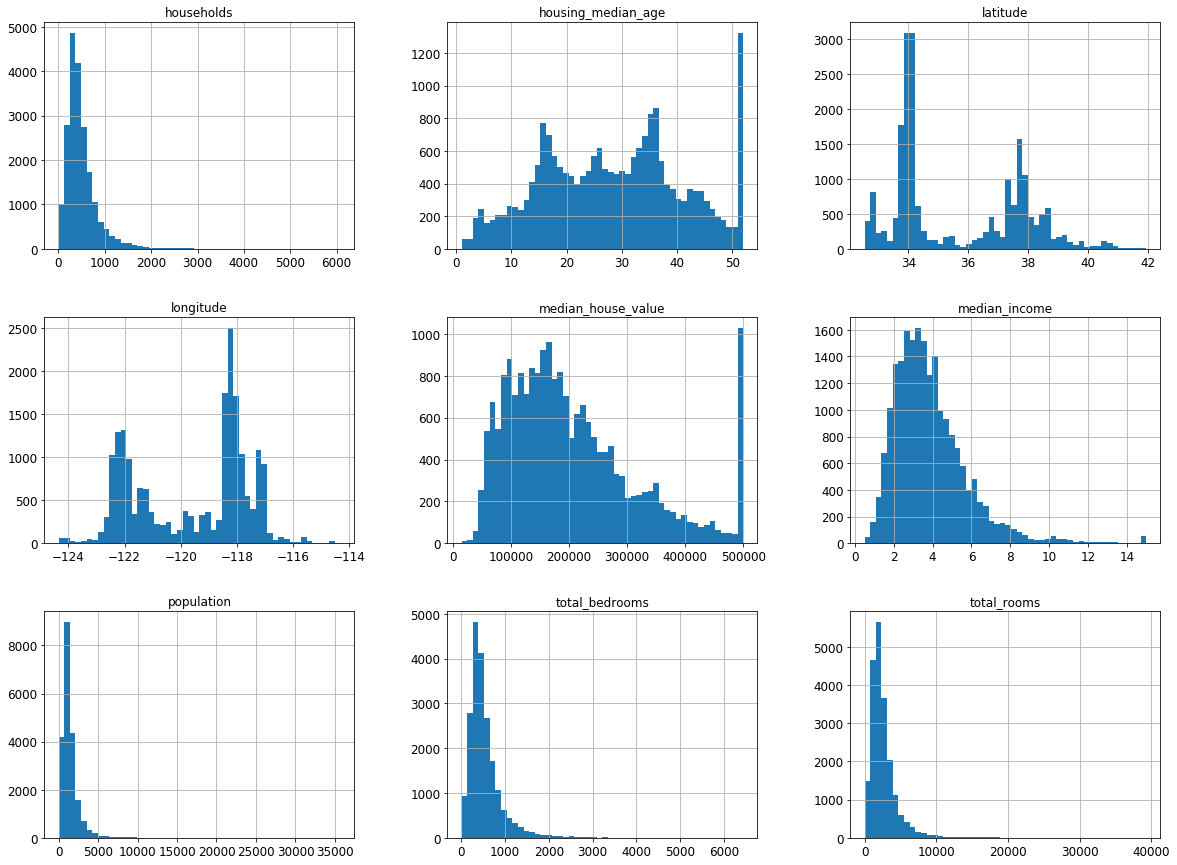

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

## Creating test set

In [0]:
import numpy as np

In [0]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [16]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier) & 0xffffffff < test_ratio * 2**32)

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    print(ids.apply(lambda id_:test_set_check(id_, test_ratio)))
#     return data.loc[~in_test_set], data.loc[in_test_set]


housing_with_id = housing.reset_index()
split_train_test_by_id(housing_with_id, 0.2, "index")

0        2768625435
1        2768625435
2        2768625435
3        2768625435
4        2768625435
            ...    
20635    2768625435
20636    2768625435
20637    2768625435
20638    2768625435
20639    2768625435
Name: index, Length: 20640, dtype: int64


In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [18]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


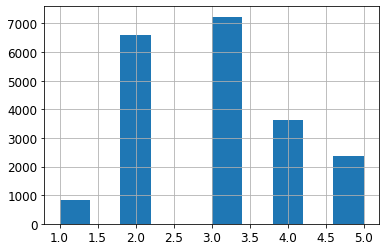

In [19]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

housing['income_cat'].hist()

[sklearn.model_selection.StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html)

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit


X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1])
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)

print(sss)
count = 0
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    count+=1
   

print(count)
print(X_train)
print(y_train)

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.5,
            train_size=None)
TRAIN: [5 2 3] TEST: [4 1 0]
TRAIN: [5 1 4] TEST: [0 2 3]
TRAIN: [5 0 2] TEST: [4 3 1]
TRAIN: [4 1 0] TEST: [2 3 5]
TRAIN: [0 5 1] TEST: [3 4 2]
5
[[1 2]
 [3 4]
 [3 4]]
[0 1 0]


In [0]:

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [22]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [23]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3


In [0]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [0]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

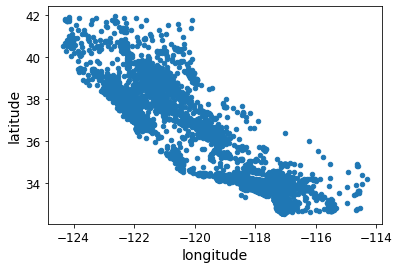

In [26]:
housing.plot(kind='scatter', x='longitude', y='latitude')

Setting the alpha option to 0.1 makes it much easier to visualize the places
where there is a high density of data points 

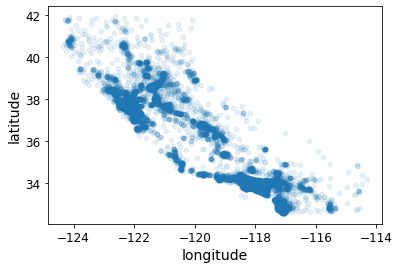

In [27]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

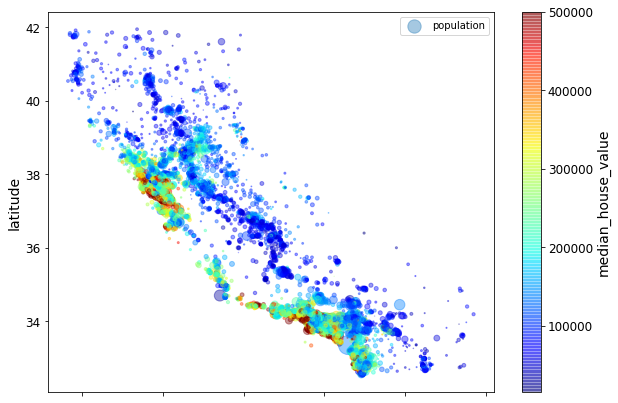

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

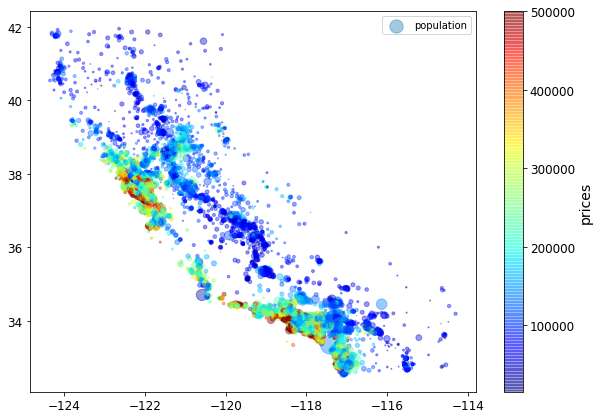

In [29]:
plt.figure(figsize=(10, 7))
plt.scatter(housing["longitude"], housing["latitude"], alpha=0.4,
    s=housing["population"]/100, label="population",
    c=housing["median_house_value"], cmap=plt.get_cmap("jet"))

cbar = plt.colorbar()
cbar.set_label('prices')
plt.legend()


## Looking for correlations

In [0]:
corr_matrix = housing.corr()

In [31]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

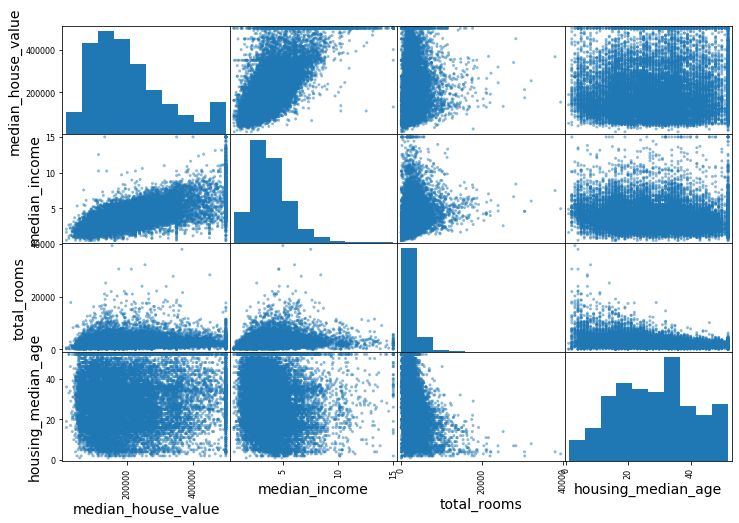

In [32]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]
_ = scatter_matrix(housing[attributes], figsize=(12, 8))

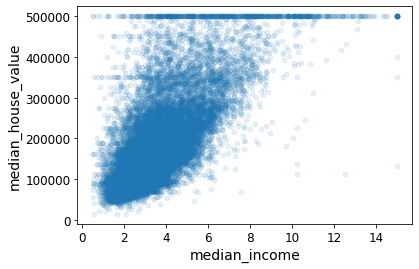

In [33]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',
            alpha=0.1)

## Experimenting with Attribute Combinations


The
total number of rooms in a district is not very useful if you don’t know how many
households there are. What you really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. And the population per household also
seems like an interesting attribute combination to look at. 

In [0]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [35]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of
rooms per household is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive they are.

# Prepare the Data for Machine Learning Algorithms

In [0]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

Most Machine Learning algorithms cannot work with missing features, so let’s create
a few functions to take care of them. You noticed earlier that the total_bedrooms
attribute has some missing values, so let’s fix this. You have three options:
 
•  Get rid of the corresponding districts.

•  Get rid of the whole attribute.

•  Set the values to some value (zero, the mean, the median, etc.).

```
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

In [0]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

Since the median can only be computed on numerical attributes, we need to create a
copy of the data without the text attribute ocean_proximity

In [0]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [39]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [40]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [41]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [0]:
X = imputer.transform(housing_num)

In [0]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

## Handling Text and Categorical Attributes


In [0]:
housing_cat = housing[["ocean_proximity"]]

In [45]:
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [0]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [0]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [48]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [49]:
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [0]:
# using one hot encoder

from sklearn.preprocessing import OneHotEncoder

In [0]:
cat_encoder = OneHotEncoder()

In [0]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [53]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [54]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [0]:
# housing_cat_1hot.toarray() # get back dense array


If a categorical attribute has a large number of possible categories
(e.g., country code, profession, species, etc.), then one-hot encod‐
ing will result in a large number of input features. This may slow
down training and degrade performance. If this happens, you may
want to replace the categorical input with useful numerical features
related to the categories: for example, you could replace the
ocean_proximity feature with the distance to the ocean (similarly,
a country code could be replaced with the country’s population and
GDP per capita). Alternatively, you could replace each category
with a learnable low dimensional vector called an embedding

## Custom Transformers

 Scikit-Learn relies on duck typing (not inher‐
itance), all you need is to create a class and implement three methods: fit()
(returning self), transform(), and fit_transform(). You can get the last one for
free by simply adding TransformerMixin as a base class. Also, if you add BaseEstimator as a base class (and avoid *args and **kargs* in your constructor) you will get
two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning.

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

In [0]:
# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


In [0]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [0]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling

There are two common ways to get all attributes to have the same scale: min-max
scaling (normalization) and standardization.

*Min-Max scaling* - subtract the min value and divide by the max value minus the min

*Standardization* - first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance,
standardization is much less affected by outliers

## Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in
the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations. Here is a small pipeline for the numerical
attributes

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [0]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
steps. All but the last estimator must be transformers (i.e., they must have a
fit_transform() method)

When you call the pipeline’s fit() method, it calls fit_transform() sequentially on
all transformers, passing the output of each call as the parameter to the next call, until
it reaches the final estimator, for which it just calls the fit() method.


The pipeline exposes the same methods as the final estimator. In this example, the last
estimator is a StandardScaler, which is a transformer, so the pipeline has a trans
form() method that applies all the transforms to the data in sequence (and of course
also a fit_transform() method, which is the one we used).


In [0]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

So far, we have handled the categorical columns and the numerical columns sepa‐
rately. It would be more convenient to have a single transformer able to handle all col‐
umns, applying the appropriate transformations to each column

In [0]:
from sklearn.compose import ColumnTransformer

num_atrribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_atrribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

Instead of a transformer, you can specify the string "drop" if you
want the columns to be dropped. Or you can specify "pass
through" if you want the columns to be left untouched. By default,
the remaining columns (i.e., the ones that were not listed) will be
dropped, but you can set the remainder hyperparameter to any
transformer (or to "passthrough") if you want these columns to be
handled differently

# Select and Train a Model

## Training and Evaluating on the Training Set


In [63]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# example run
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [65]:
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [66]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [67]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

In [68]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [0]:
housing_predictions = tree_reg.predict(housing_prepared)

In [70]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation


In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [72]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())
    
display_scores(scores)

Scores:  [-4.92724492e+09 -4.46961291e+09 -5.24647900e+09 -5.00679914e+09
 -5.05746872e+09 -5.71311365e+09 -4.93686969e+09 -4.93838343e+09
 -5.68016653e+09 -5.07394900e+09]
Mean:  -5105008697.70217
Standard Deviation:  349977765.4031221


In [73]:
# for linear regression

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard Deviation:  2731.674001798344


In [74]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [75]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [76]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean:  50182.303100336096
Standard Deviation:  2097.0810550985693


In [77]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

# Fine-Tune Your Model

## Grid Search

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

In [0]:
forest_reg = RandomForestRegressor(random_state=42)

In [0]:
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

In [82]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [83]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [84]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

If GridSearchCV is initialized with refit=True (which is the
default), then once it finds the best estimator using crossvalidation, it retrains it on the whole training set. This is usually a
good idea since feeding it more data will likely improve its perfor‐
mance.

Let's look at the score of each hyperparameter combination tested during the grid search:

In [85]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.05791727153 {'max_features': 2, 'n_estimators': 3}
55627.16171305252 {'max_features': 2, 'n_estimators': 10}
53384.57867637289 {'max_features': 2, 'n_estimators': 30}
60965.99185930139 {'max_features': 4, 'n_estimators': 3}
52740.98248528835 {'max_features': 4, 'n_estimators': 10}
50377.344409590376 {'max_features': 4, 'n_estimators': 30}
58663.84733372485 {'max_features': 6, 'n_estimators': 3}
52006.15355973719 {'max_features': 6, 'n_estimators': 10}
50146.465964159885 {'max_features': 6, 'n_estimators': 30}
57869.25504027614 {'max_features': 8, 'n_estimators': 3}
51711.09443660957 {'max_features': 8, 'n_estimators': 10}
49682.25345942335 {'max_features': 8, 'n_estimators': 30}
62895.088889905004 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.14484390074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.399594730654 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52725.01091081235 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [86]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.075333,0.004189,0.004230,0.000054,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,-4.196408e+09,-3.903319e+09,-4.184325e+09,-4.053749e+09,1.519609e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.240074,0.002608,0.011873,0.000134,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,-3.130196e+09,-2.865188e+09,-3.173856e+09,-3.094381e+09,1.327046e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,0.728209,0.009173,0.033096,0.000442,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,-2.948330e+09,-2.619995e+09,-2.970968e+09,-2.849913e+09,1.626879e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.121501,0.001340,0.004421,0.000151,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,-3.734515e+09,-3.418747e+09,-3.913907e+09,-3.716852e+09,1.631421e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.396234,0.002535,0.012083,0.000561,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,-2.892276e+09,-2.616813e+09,-2.948207e+09,-2.781611e+09,1.268562e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,1.199030,0.020513,0.033306,0.000318,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,-2.666426e+09,-2.398071e+09,-2.649316e+09,-2.537877e+09,1.214603e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.165985,0.006453,0.021287,0.033851,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,-3.592772e+09,-3.328934e+09,-3.579607e+09,-3.441447e+09,1.893141e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,0.547368,0.004977,0.011937,0.000301,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,-2.762720e+09,-2.521134e+09,-2.907667e+09,-2.704640e+09,1.471542e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,1.666984,0.015748,0.033720,0.000668,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,-2.607703e+09,-2.350953e+09,-2.661059e+09,-2.514668e+09,1.285063e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.216706,0.008417,0.004418,0.000206,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,-3.402843e+09,-3.129307e+09,-3.510047e+09,-3.348851e+09,1.241864e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


## Randomized CV

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs ={
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8)
}

forest_reg = RandomForestRegressor(random_state=42)

rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5, scoring='neg_mean_squared_error',
                               random_state=42)

rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [0]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [89]:
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [0]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])

In [91]:
attributes = num_atrribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

In [0]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [93]:
final_rmse

47730.22690385927

In [94]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) **2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

# Extra material

## A full pipeline with both preparation and prediction

In [95]:
full_pipeline_with_predictor = Pipeline([
    ("pipeline", full_pipeline),
    ("linear", LinearRegression())
])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

## Model persistence using joblib

In [0]:
my_model = full_pipeline_with_predictor

In [0]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

# Excercise

1.

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "kernel": ['linear'], 
        'C':[10., 30., 100., 300., 1000., 3000., 10000., 30000.0]
    
    },
    
    {
        'kernel': ['rbf'], 
        'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
        'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]
    }
]

In [0]:
from sklearn.svm import SVR


svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                          verbose=2)
grid_search.fit(housing_prepared, housing_labels)